In [1]:
#importing keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Input, SpatialDropout1D
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [2]:
# DataFrame
import pandas as pd
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
#numpy
import numpy as np
#utility
import re
# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
# sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn as sk

In [3]:
#Load Dataset
df = pd.read_csv("./sentiment_data.csv")

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     9087 non-null   int64 
 1   Unnamed: 0.1   9087 non-null   int64 
 2   unnamed: 0     9087 non-null   int64 
 3   tweet_content  9087 non-null   object
 4   harassment     9087 non-null   int64 
 5   indirecth      9087 non-null   int64 
 6   physicalh      9087 non-null   int64 
 7   sexualh        9087 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 568.1+ KB


In [5]:
# !pip install tweet-preprocessor

In [6]:
import preprocessor as p

In [7]:
train_df = df.dropna()
train_df = df.drop_duplicates()

In [8]:
train_df.count()

Unnamed: 0       9087
Unnamed: 0.1     9087
unnamed: 0       9087
tweet_content    9087
harassment       9087
indirecth        9087
physicalh        9087
sexualh          9087
dtype: int64

In [9]:
def preprocess_tweet(row):
    text = row['tweet_content']
    text = p.clean(tweet_content)
    return tweet_content

In [10]:
train_df.head()

,Unnamed: 0,Unnamed: 0.1,unnamed: 0,tweet_content,harassment,indirecth,physicalh,sexualh
0,0,5830,5830,concurso porno japon go girl nude nylon stock ...,1,0,0,1
1,1,2880,2880,ava lauren cheat deep throat syndrom porn extr...,1,0,0,1
2,2,3844,3844,watch old classic movi pandora fli dutchman av...,0,0,0,0
3,3,2636,2636,memesyndrom terribl trend sassi x89 co yqpungwhpj,0,0,0,0
4,4,2557,2557,youwantsumfuck ava mfc thought pregnanc announ...,1,0,0,1


In [11]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [12]:
df = df.append(df, ignore_index=True)

In [13]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [14]:
# remove twitter handles (@user)
df['tweet_content'] = np.vectorize(remove_pattern)(df['tweet_content'], "@[\w]*")

In [15]:
#Removing short words
df['tweet_content'] = df['tweet_content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unnamed: 0,tweet_content,harassment,indirecth,physicalh,sexualh
0,0,5830,5830,concurso porno japon girl nude nylon stock col...,1,0,0,1
1,1,2880,2880,lauren cheat deep throat syndrom porn extrem f...,1,0,0,1
2,2,3844,3844,watch classic movi pandora dutchman gardner ja...,0,0,0,0
3,3,2636,2636,memesyndrom terribl trend sassi yqpungwhpj,0,0,0,0
4,4,2557,2557,youwantsumfuck thought pregnanc announc captio...,1,0,0,1


In [17]:
df_text_genre=df[['tweet_content','harassment', 'indirecth','physicalh','sexualh']]

In [18]:
train, test = train_test_split(df_text_genre, test_size=0.3, random_state=42, shuffle=True)

In [19]:
#Load Dataset
tf = pd.read_csv("./testset-competition.csv",)

In [20]:
print(df_text_genre)

                                           tweet_content  harassment  \
0      concurso porno japon girl nude nylon stock col...           1   
1      lauren cheat deep throat syndrom porn extrem f...           1   
2      watch classic movi pandora dutchman gardner ja...           0   
3             memesyndrom terribl trend sassi yqpungwhpj           0   
4      youwantsumfuck thought pregnanc announc captio...           1   
...                                                  ...         ...   
18169  tommygrimaldi sexyarmpit happen night well eve...           0   
18170           homegirl travel drive weekend jwabh6gus7           0   
18171   lfceric cheat cousin excus want prove marri kick           0   
18172  kokomothegreat slut alway slut take girl ghett...           1   
18173  italian german porno unwant manga czech wbdk1z...           1   

       indirecth  physicalh  sexualh  
0              0          0        1  
1              0          0        1  
2              0  

In [21]:
tokenizer = Tokenizer(num_words=None, split=' ')
tokenizer.fit_on_texts(train['tweet_content'].values)
x = tokenizer.texts_to_sequences(train['tweet_content'].values)
x = pad_sequences(x, maxlen=20, padding='post')
print(x[54])

[663 731 839 246 110 159 197 105   3   0   0   0   0   0   0   0   0   0
   0   0]


In [22]:
y = tokenizer.texts_to_sequences(test['tweet_content'].values)
y = pad_sequences(y, maxlen=20, padding='post')
print(y[3])

[ 166  250   25  266  191 7798    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


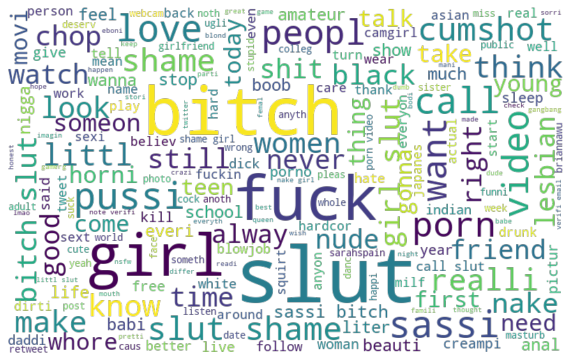

In [23]:
all_words = ' '.join([text for text in df['tweet_content']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, mode = "RGBA", background_color=None).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

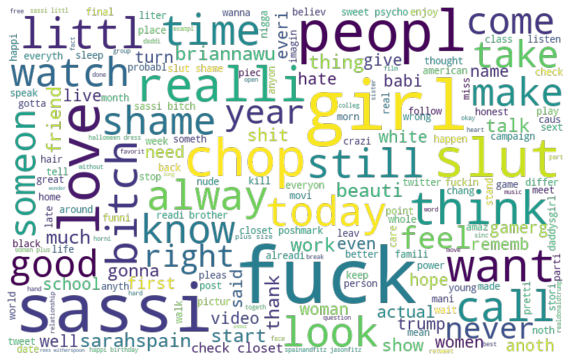

In [24]:
normal_words =' '.join([text for text in df['tweet_content'][df['harassment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, mode = "RGBA", background_color=None).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

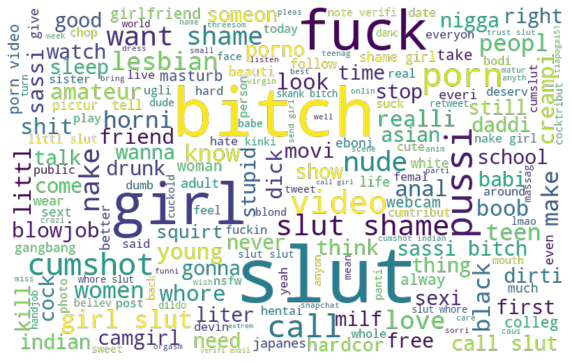

In [25]:
negative_words = ' '.join([text for text in df['tweet_content'][df['harassment'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110, mode = "RGBA", background_color=None).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [27]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(df['tweet_content'][df['harassment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['tweet_content'][df['harassment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['tweet_content'])

In [29]:
from sklearn.model_selection import train_test_split
x_test = train.iloc[:,1:].values
y_test=test.iloc[:,1:].values

In [30]:
print(x_test)

[[1 0 0 1]
 [1 0 0 1]
 [1 0 0 1]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [31]:
batch_size =16
epochs = 21

In [32]:
model = Sequential()
model.add(Embedding(14645, 256))
model.add(Dropout(0.4))
model.add(LSTM(32, dropout=0.4, recurrent_dropout=0.1))
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         3749120   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                36992     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 3,786,244
Trainable params: 3,786,244
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [34]:
history=model.fit(x, x_test,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(y, y_test))

C:\Users\Admin\anaconda3\envs\math_env\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 12721 samples, validate on 5453 samples
Epoch 1/21
12721/12721 [==============================] - 49s 4ms/step - loss: 0.2467 - accuracy: 0.9003 - val_loss: 0.1545 - val_accuracy: 0.9536
Epoch 2/21
12721/12721 [==============================] - 48s 4ms/step - loss: 0.1228 - accuracy: 0.9622 - val_loss: 0.1019 - val_accuracy: 0.9661
Epoch 3/21
12721/12721 [==============================] - 42s 3ms/step - loss: 0.0688 - accuracy: 0.9778 - val_loss: 0.0864 - val_accuracy: 0.9724
Epoch 4/21
12721/12721 [==============================] - 42s 3ms/step - loss: 0.0447 - accuracy: 0.9847 - val_loss: 0.0723 - val_accuracy: 0.9759
Epoch 5/21
12721/12721 [==============================] - 42s 3ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0728 - val_accuracy: 0.9783
Epoch 6/21
12721/12721 [==============================] - 42s 3ms/step - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0625 - val_accuracy: 0.9813
Epoch 7/21
12721/12721 [==============================] - 44s 3ms/ste

In [35]:
print(history.history)

{'val_loss': [0.15453996027410086, 0.10190036013386303, 0.08640063847398924, 0.0722844681748497, 0.07275595350196803, 0.06247570813241878, 0.06961846075813372, 0.06441575235127173, 0.06619000403484128, 0.07486607630387175, 0.07763253163557254, 0.07858509889559767, 0.060364625454270064, 0.07162217766682037, 0.07516031776942236, 0.0708438343706722, 0.08282928036429947, 0.0818390865446986, 0.09246431842523012, 0.10395367052198562, 0.0969054333770384], 'val_accuracy': [0.9536035060882568, 0.9660736918449402, 0.9724463820457458, 0.9758848547935486, 0.9782688617706299, 0.9812946915626526, 0.9812946915626526, 0.9822574853897095, 0.9806987047195435, 0.9819365739822388, 0.9821657538414001, 0.9810654520988464, 0.9829451441764832, 0.9829910397529602, 0.9828076362609863, 0.9837704300880432, 0.9817073345184326, 0.9812946915626526, 0.980790376663208, 0.9806528687477112, 0.9810196161270142], 'loss': [0.24673085965209718, 0.12277619380028897, 0.06880860320685485, 0.04471287496934701, 0.032978358379597

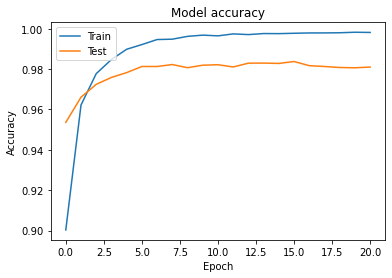

In [36]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

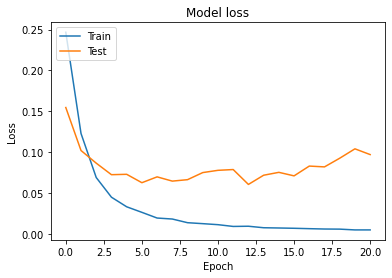

In [37]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
score= model.evaluate(y, y_test, verbose = 2)
print("Loss: %.2f" % score[0])
print("Accuracy: %.2f" % score[1])

Loss: 0.10
Accuracy: 0.98


In [39]:
prediction = model.predict(x)

In [40]:
print('Prediction value:', prediction[374:377])

Prediction value: [[9.9982637e-01 1.7775277e-04 2.9334831e-05 9.9982446e-01]
 [9.9986470e-01 3.0525774e-05 6.1492661e-05 9.9985564e-01]
 [9.9990082e-01 1.7392327e-05 4.6258756e-05 9.9992299e-01]]


In [41]:
z = tokenizer.texts_to_sequences(tf['tweet_content'].values)
z = pad_sequences(z, maxlen=22, padding='post')

In [42]:
pred=model.predict(z)
print('Prediction value:', pred[420])

Prediction value: [7.01321755e-04 1.07665626e-04 8.14284940e-05 2.96344195e-04]


In [43]:
for i in range(len(pred)):
    tf.at[i,'Harassment']=int(0)
    tf.at[i,'IndirectH']=int(0)
    tf.at[i,'PhysicalH']=int(0)
    tf.at[i,'SexualH']=int(0)
    if pred[i,0]>=0.4:
        tf.at[i,'Harassment']=1
        t=np.argmax(pred[i,1:])
        if t==2:
            tf.at[i,'SexualH']=int(1)
        elif t==1:
            tf.at[i,'PhysicalH']=int(1)
        elif t==0:
            tf.at[i,'IndirectH']=int(1)

In [44]:
tf[420:431]

,tweet_content,Harassment,IndirectH,PhysicalH,SexualH
420,naked girls fingering eachother beautiful girl...,0.0,0.0,0.0,0.0
421,naked girls vigina sexy swedish men pics,1.0,0.0,0.0,1.0
422,naked pillow fights nude girls in the farm,0.0,0.0,0.0,0.0
423,nanuqsaurus was a tyrannosaur from the late cr...,0.0,0.0,0.0,0.0
424,nasa commanded voyager to fire its thrusters f...,1.0,0.0,0.0,1.0
425,nature at its best in troms norway by tommy si...,0.0,0.0,0.0,0.0
426,nawww im the last person to criticize other pp...,1.0,0.0,0.0,1.0
427,nba young boy has a shitty ass personality his...,0.0,0.0,0.0,0.0
428,nba youngboy beat his gf ass blacked her eye a...,1.0,0.0,0.0,1.0
429,need a bitch who know algebra,1.0,0.0,0.0,1.0


In [45]:
model.save('./model.h5')

In [46]:
tf.to_csv('./testset-competition-result.csv')

In [47]:
from keras.utils import plot_model